# Chapter 3

### Import MNIST dataset

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [12]:
import pandas as pd
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [13]:
y.shape

(70000,)

### Look at one digit from the dataset

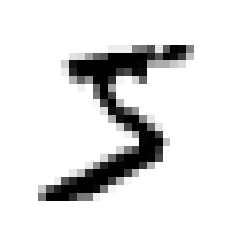

In [25]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

some_digit = X.iloc[0]
some_digit_array = some_digit.array
some_digit_image = some_digit_array.reshape(28, 28)

plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [26]:
y[0]

'5'

### Cast y to an integer

In [27]:
y = y.astype(np.uint8)

#### The data is already split into a training set (the first 60,000 images) and a test set (the last 10,000 images). We don't have to worry about cross-validation.

In [29]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Training a Binary Classifier

### Try to identify the number 5 - this is a binary classifier

In [30]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

### Pick a classifier and train it - start with Stochastic Gradient Descent (SGD) Classifier
- This classifier has the advantage of being capable of handling very large datasets efficiently
- SGD deals with training instances independently, one at a time
- SGD is well suited for online learning

In [32]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

sgd_clf.predict([some_digit])

/opt/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

# Performance Measures

- Evaluating a classifier is often significantly trickier than evaluating a regrosser.
- There are many performance measures available
- A good way to evaluate a model is to use cross-validation

### Measuring Accuracy Using Cross-Validation

In [34]:
# The following code does roughly the same thing as Scikit-Learn's cross_val_score() function

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_folds = X_train[test_index]
    y_test_folds = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train, folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

KeyError: "None of [Int64Index([    1,     3,     4,     5,     7,     8,    10,    11,    12,\n               13,\n            ...\n            59984, 59985, 59987, 59988, 59989, 59991, 59993, 59994, 59996,\n            59998],\n           dtype='int64', length=40000)] are in the [columns]"

In [35]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

### Confusion Matrix
- A much better way to evaluate the performance of a classifier is to look at the confusion matrix
- To compute the confusion matrix, you first need to have a set of predictions so that they can be compared to the actual targets
- Use the cross_val_predict() function

In [40]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

- Each row in a confusion matrix represets an actual class, while each column represents a predicted class
- 53,892 of the negative class were correctly classified as non-5s (true negatives)
- 687 of the negative class were wrongly classified as 5s (false positive)
- 1891 of the positive class were wrongly classified as non-5s (false negative)
- 3530 were correctly classified as 5s (true positive)

In [42]:
y_train_perfect_predictions = y_train_5 # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

### Precision
- Accuracy of the positive predictions
- TP / (TP + FP)

### Recall or Sensitivity or True Positive Rate
- the ratio of positive instances that are correctly detected by the classifier
- TP / TP + FN

In [43]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [44]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

### Harmonic Mean of Precision and Recall
- It is often convenient to combine precision and recall into a single metric called the F1 Score
- Harmonic mean gives much more weight to low values
- The classifier will only get a high F1 score if both recall and precision are high
- The f1 score favors classifiers that have similar precision and recall

In [45]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846